In [1]:
from nn4cast.predefined_classes import Dictionary_saver,Preprocess,Model_build_and_test,Model_searcher,Results_plotter,PC_analysis
import numpy as np
import tensorflow as tf

hyperparameters = {
    # File paths
    'path': '/home/victor/Desktop/prueba_nn4cast/Datasets/',
    'path_x': 'HadISST1_sst_1870-2019.nc',
    'path_y': 'slp_ERA5_1940-2023.nc',

    # Time limits
    'time_lims': [1940, 2019],

    # Years for output: using the policy of the predictor years
    'years_finally': np.arange(1940, 2019+1, 1), 
    'jump_year': 0, #this is necesary when the predictor and predictand has different years for each sample (default=0)

    # Train, validation, and testing years: if dealing with X and Y of different years for each sample,
    # the years policy is from the input (X)
    'train_years': [1940, 1989],
    'validation_years': [1990,1999],
    'testing_years': [2000, 2019],

    # Input and output limits: for latitude first the northernmost, for longitude either -
    # -180-(+180) or 0-360, putting first the smaller number
    'lat_lims_x': [+75, -20],
    'lon_lims_x': [+120, +280],
    'lat_lims_y': [+75, -20], 
    'lon_lims_y': [-180, +180], 

    #Variable names, as defined in the .nc datasets
    'name_x': 'sst',
    'name_y': 'msl',

    # Months and months to skip
    'months_x': [9, 10],
    'months_skip_x': ['None'],
    'months_y': [11, 12],
    'months_skip_y': ['None'],

    # Seasonal method: select if computing seasonal means of aggregrates (True if means)
    'mean_seasonal_method_x': True,
    'mean_seasonal_method_y': True,
    
    # Regrid degrees: if you want to do a regrid of the data, if not, just put 0
    'regrid_degree_x': 2, 
    'regrid_degree_y': 2, 

    # Data scales: if you want to do a scale of the data, if not, just put 1
    'scale_x': 1, 
    'scale_y': 100, 

    # Detrending:
    'detrend_x': True, 
    'detrend_x_window': 15,
    'detrend_y': True,
    'detrend_y_window': 15,

    # Neural network hyperparameters (default parameters)
    'layer_sizes': [1024, 256, 64],
    'activations': [tf.keras.activations.elu, tf.keras.activations.elu, tf.keras.activations.elu],
    'dropout_rates': [0.1],
    'kernel_regularizer': 'l2',
    'learning_rate': 0.0001,
    'epochs': 2500,
    'num_conv_layers':0,
    'use_batch_norm':True, 
    'use_initializer':True, 
    'use_dropout':True, 
    'use_initial_skip_connections':False, 
    'use_intermediate_skip_connections':False,

    # Plotting parameters
    'mapbar': 'bwr',
    'units_x': '[$^{\circ} C$]',
    'units_y': '[$hPa$]',
    'region_predictor': 'Pacific',
    'p_value': 0.1,

    # Outputs path: define where to save all the plots and datasets
    'outputs_path': '/home/victor/Desktop/nn4cast_paper/Outputs/'}

Dictionary_saver(hyperparameters) #this is to save the dictionary, it will ask to overwrite if there is another with the same name in the directory

# Access the informative variables
print('****Informative variables****')
print(f"Predictor region: {hyperparameters['region_predictor']}")
print(f"Predictor months: {hyperparameters['months_x']} ; Predictant months: {hyperparameters['months_y']}")
print(f"Predictor lat_lims: {hyperparameters['lon_lims_x']} ; lon_lims: {hyperparameters['lat_lims_x']} || Predictant lat_lims: {hyperparameters['lat_lims_y']} ; lon_lims: {hyperparameters['lon_lims_y']}")
print(f"Periods for: training= {hyperparameters['train_years']} ; validation= {hyperparameters['validation_years']}; testing= {hyperparameters['testing_years']}")
print(f"Layers sizes: {hyperparameters['layer_sizes']} ; activations: {hyperparameters['activations']} ; dropout_rates: {hyperparameters['dropout_rates']} ; kernel_regularizer: {hyperparameters['kernel_regularizer']}")

2024-06-13 14:48:28.484098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-13 14:48:28.484109: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/victor/miniconda3/envs/nn4cast_with_importances/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Checking if the file already exists in the current directory...
Dictionary saved to /home/victor/Desktop/nn4cast_paper/Outputs/dict_hyperparms.yaml
****Informative variables****
Predictor region: Pacific
Predictor months: [9, 10] ; Predictant months: [11, 12]
Predictor lat_lims: [120, 280] ; lon_lims: [75, -20] || Predictant lat_lims: [75, -20] ; lon_lims: [-180, 180]
Periods for: training= [1940, 1989] ; validation= [1990, 1999]; testing= [2000, 2019]
Layers sizes: [1024, 256, 64] ; activations: [<function elu at 0x7dd8abc7c430>, <function elu at 0x7dd8abc7c430>, <function elu at 0x7dd8abc7c430>] ; dropout_rates: [0.1] ; kernel_regularizer: l2


Preprocessing the data
Detrending sst data...
Detrending msl data...
Preprocessing done (Time taken: 3.00 seconds)
Now creating and training the model


2024-06-13 14:48:35.062073: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-13 14:48:35.062086: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-13 14:48:35.062096: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (victor-tropa33): /proc/driver/nvidia/version does not exist
2024-06-13 14:48:35.062179: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


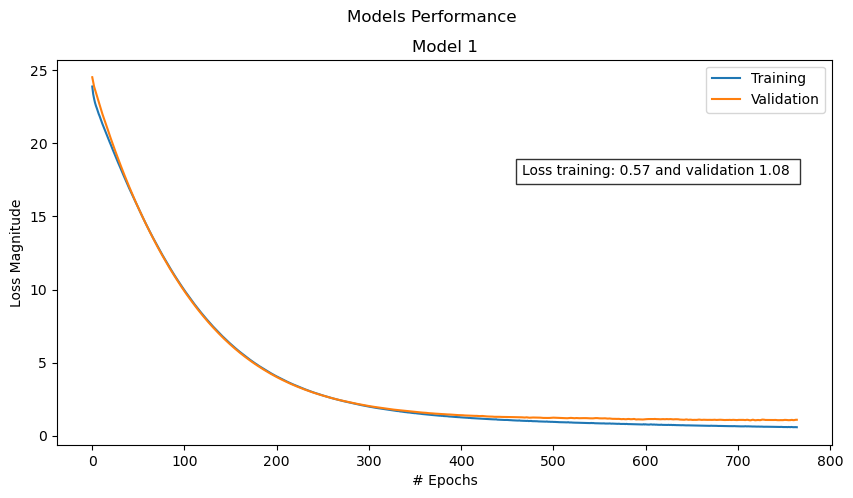

Training done (Time taken: 26.38 seconds)


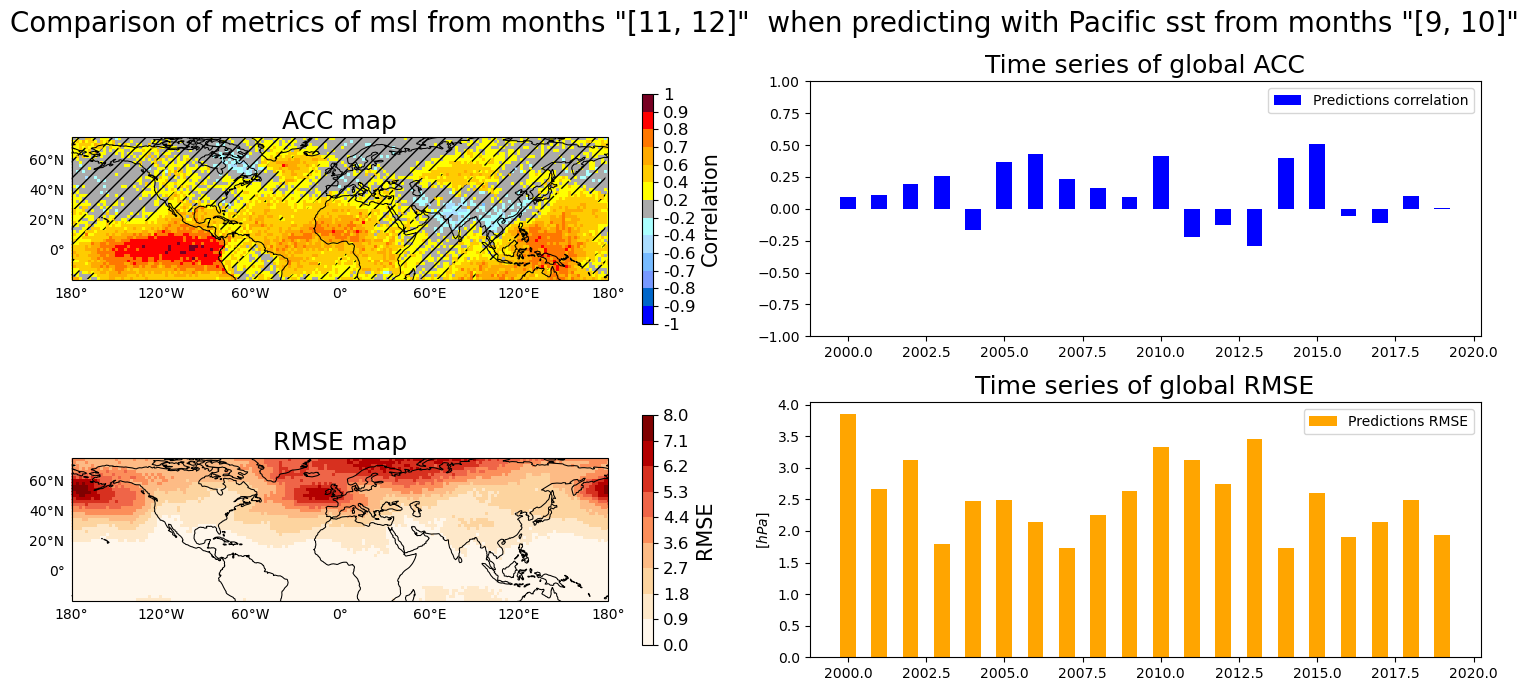

In [2]:
dictionary_preprocess= Preprocess(dictionary_hyperparams= hyperparameters)
outputs_hold_out = Model_build_and_test(dictionary_hyperparams= hyperparameters, dictionary_preprocess= dictionary_preprocess, cross_validation= False, n_cv_folds=0)

Now creating and training the model
Fold 1/4
Training on: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019]
Testing on: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959]
Computing importances for each year over the selected region...
Fold 2/4
Training on: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019]
Testing on: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979]
Computing impo

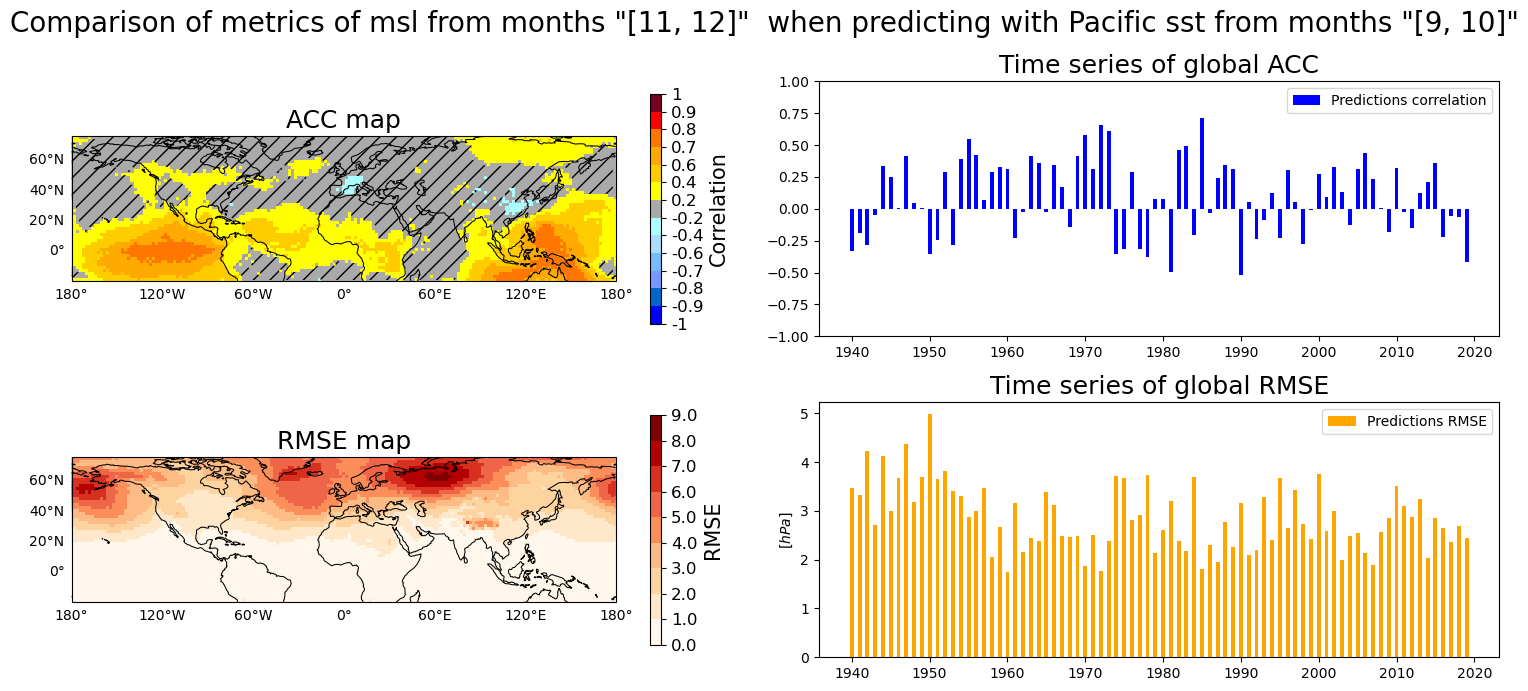

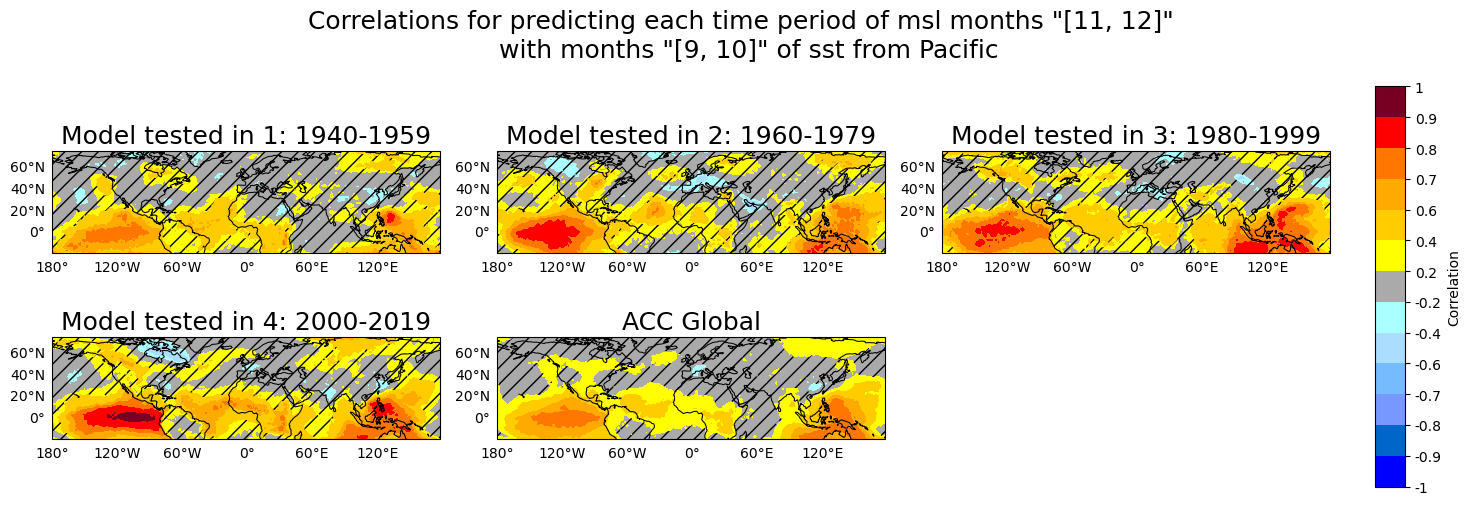

In [3]:
outputs_cross_validation= Model_build_and_test(dictionary_hyperparams=hyperparameters, dictionary_preprocess=dictionary_preprocess, cross_validation=True, n_cv_folds=4, plot_differences=False, importances=True, region_importances=[[50,65],[-25,-10]])

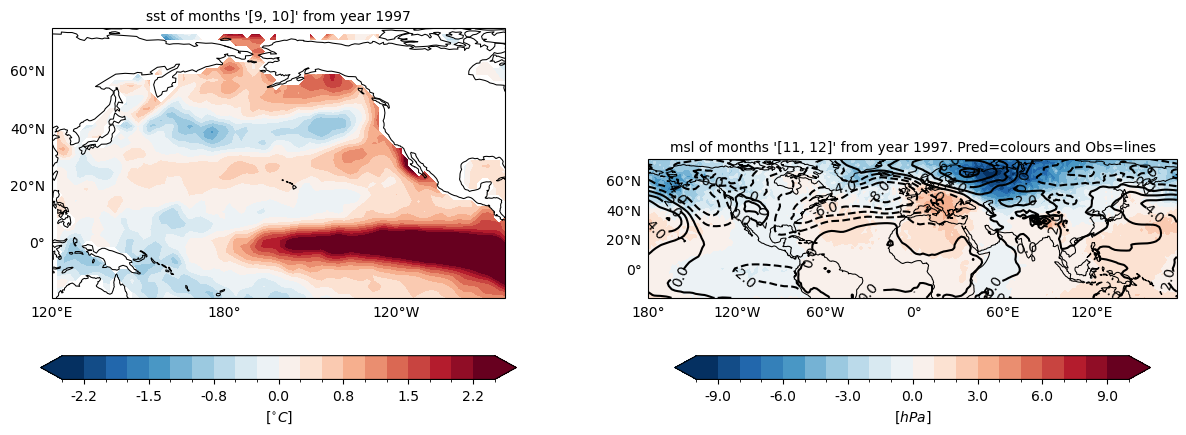

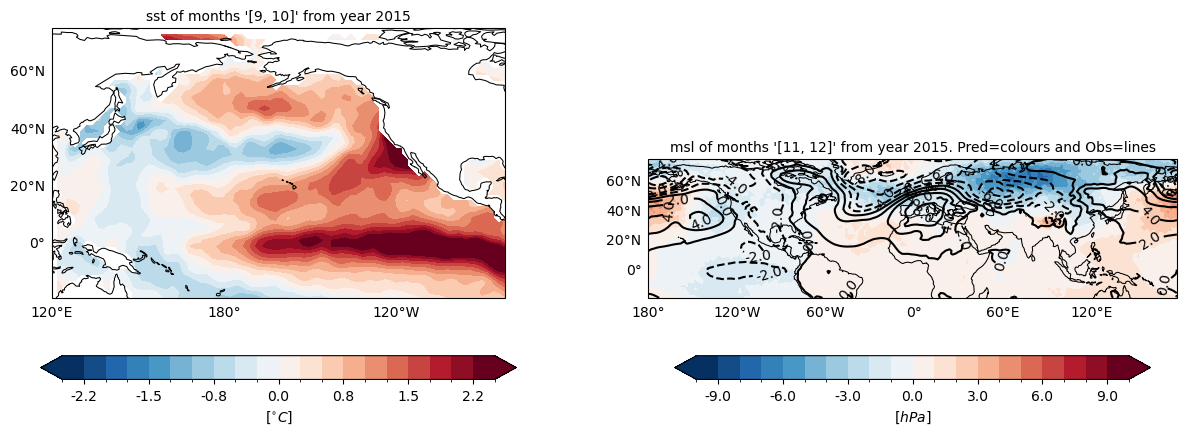

In [6]:
Results_plotter(hyperparameters, dictionary_preprocess, rang_x=2.5, rang_y=10, predictions=outputs_cross_validation['predictions'], observations=outputs_cross_validation['observations'], years_to_plot=[1997,2015], plot_with_contours=True)

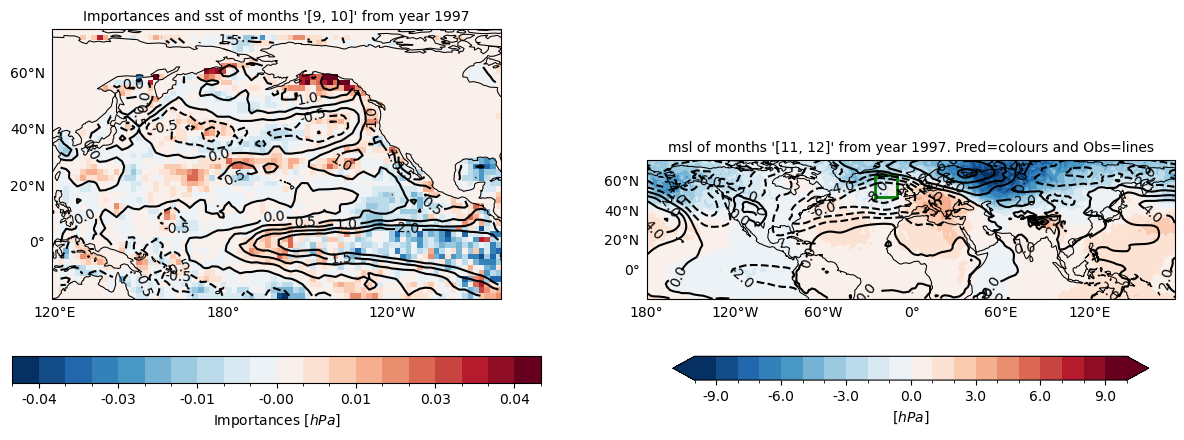

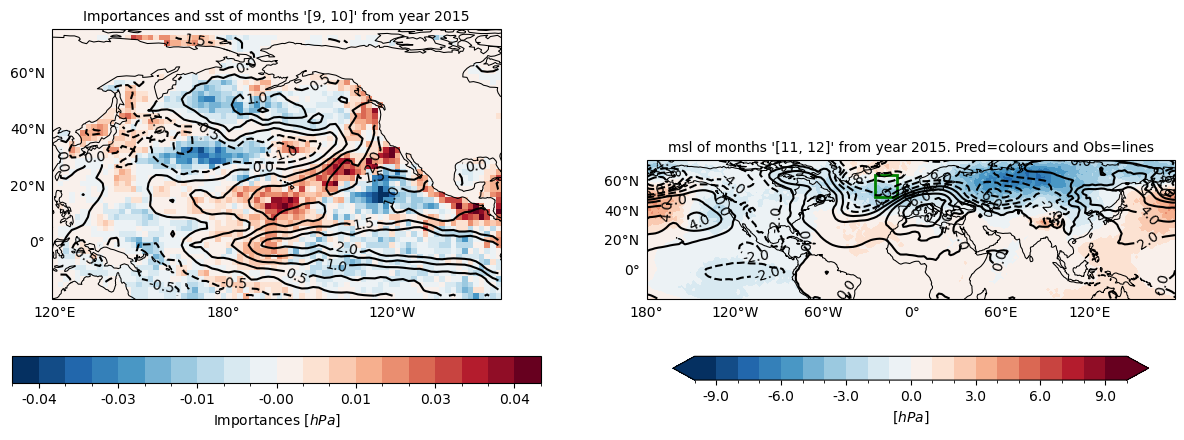

In [7]:
Results_plotter(hyperparameters, dictionary_preprocess, rang_x=2.5, rang_y=10, predictions=outputs_cross_validation['predictions'], observations=outputs_cross_validation['observations'], years_to_plot=[1997,2015], plot_with_contours=True, importances=outputs_cross_validation['importances'], region_importances=outputs_cross_validation['region_attributed'])

Explained variance ratio: [0.25161518 0.23636448 0.14613647 0.08191517]
Explained variance ratio: [0.2780685  0.15807899 0.0992362  0.07628428]


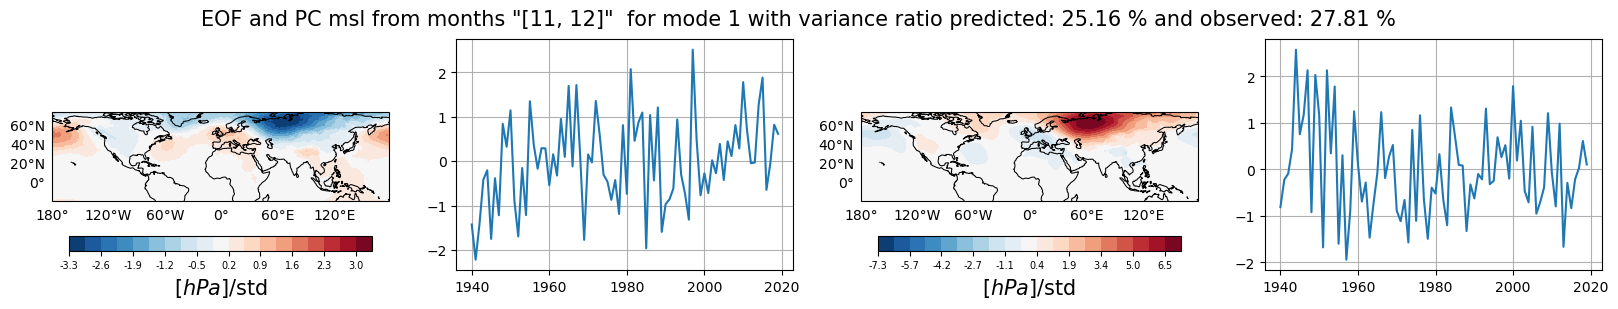

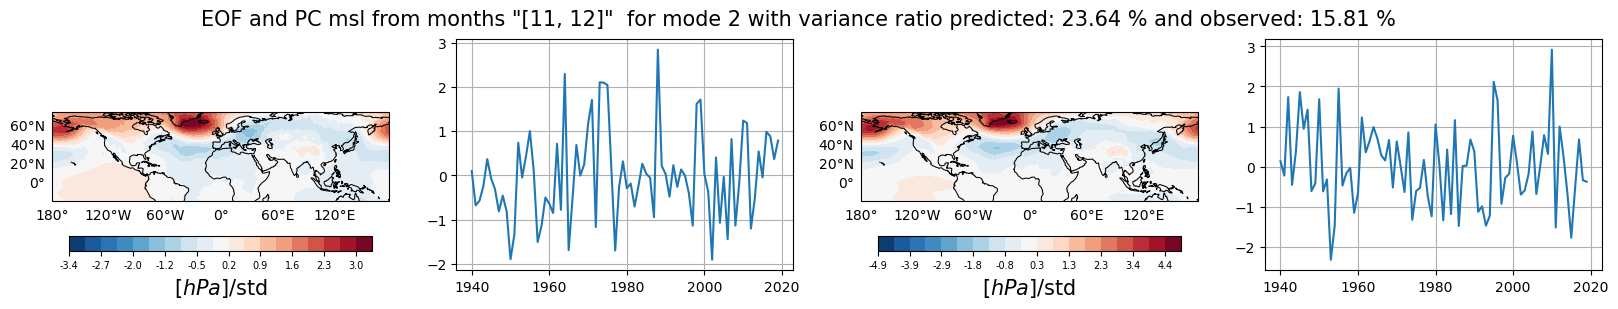

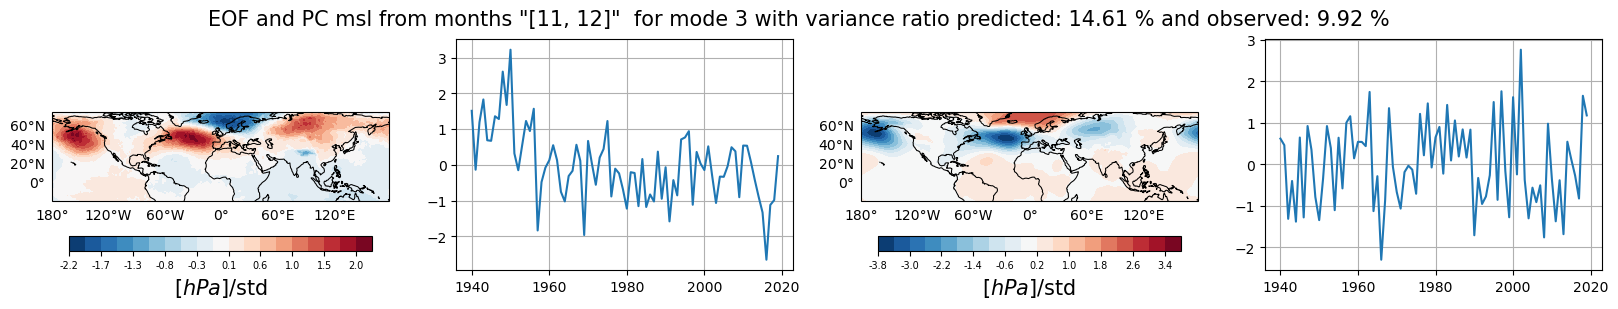

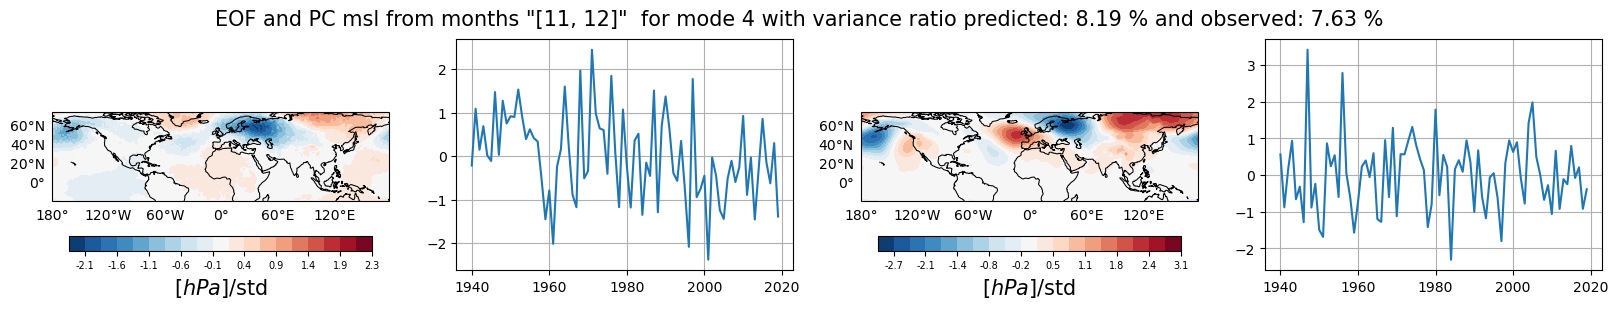

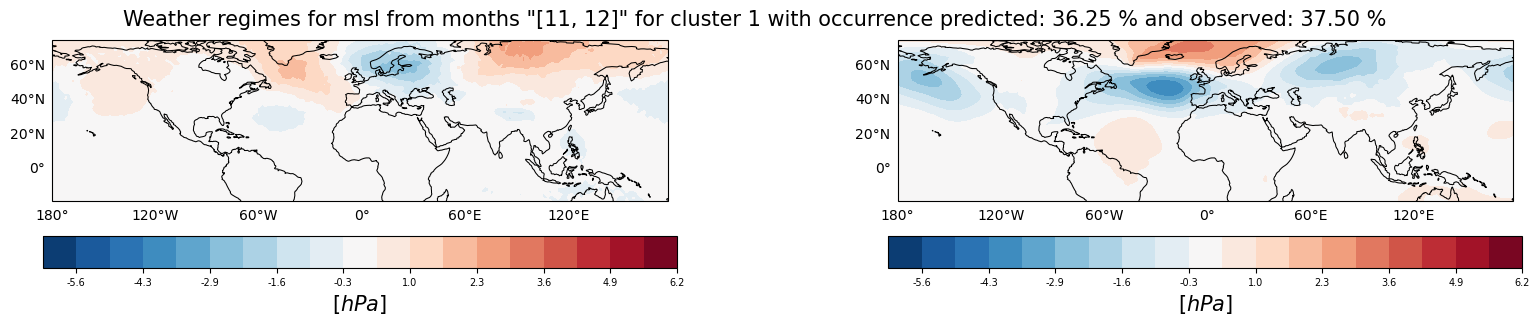

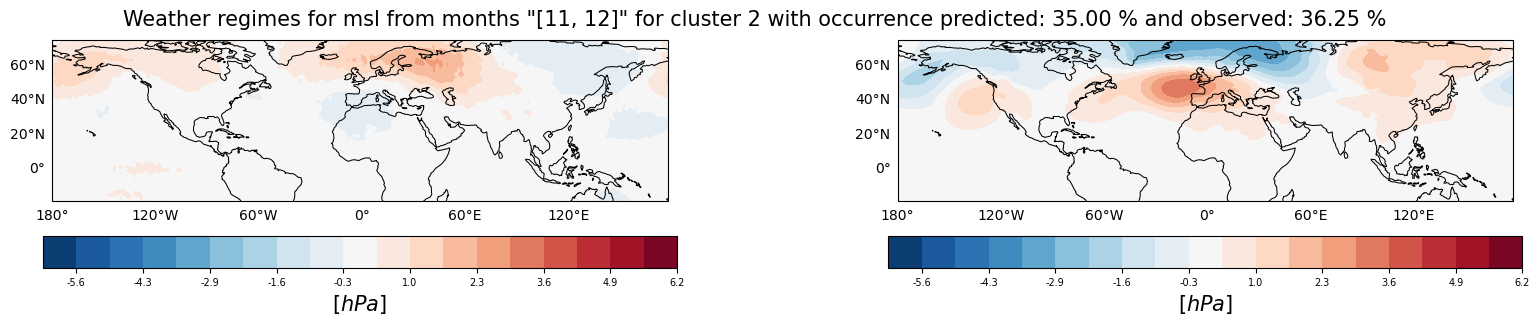

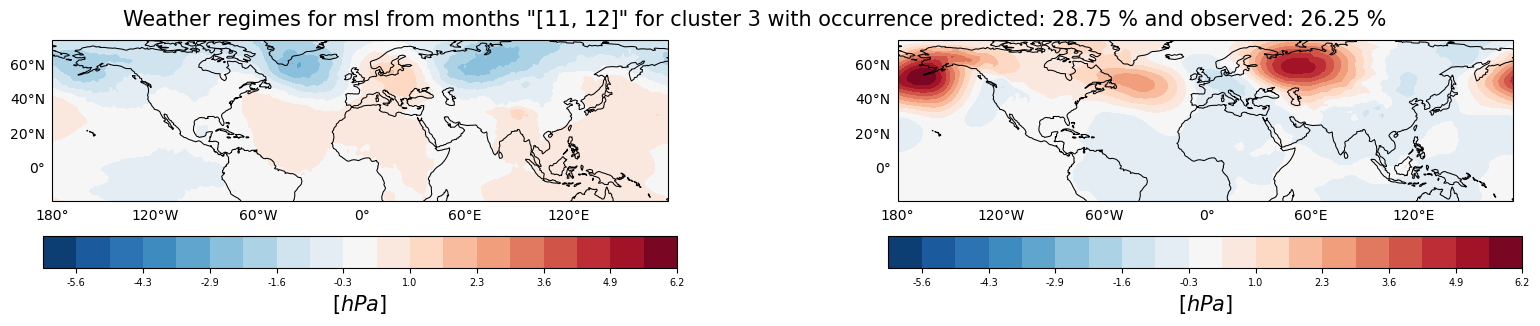

In [8]:
eof_analysis = PC_analysis(hyperparameters, outputs_cross_validation['predictions'], outputs_cross_validation['observations'], n_modes=4, n_clusters=3, cmap='RdBu_r')


Trial 20 Complete [00h 00m 05s]
val_loss: 0.8908342123031616

Best val_loss So Far: 0.8555251955986023
Total elapsed time: 00h 06m 32s
INFO:tensorflow:Oracle triggered exit
Now creating and training the best model


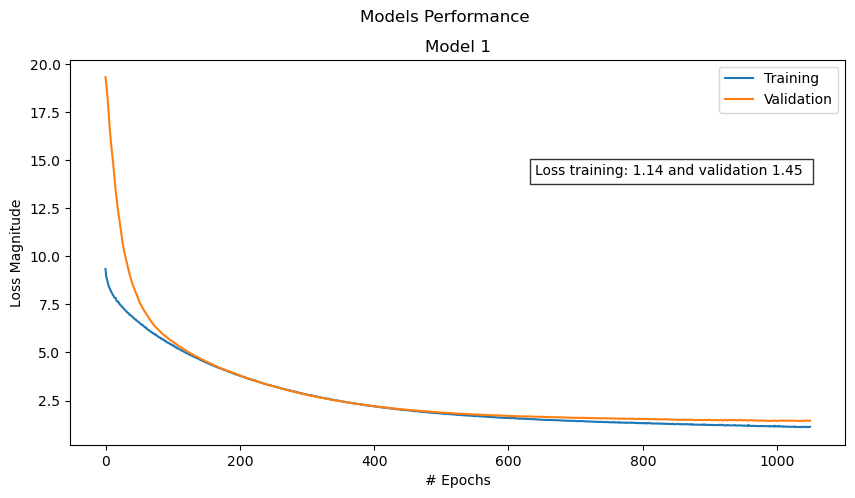

Training done (Time taken: 19.73 seconds)
Now evalutating the best model on the test set
Now creating and training the best model
Now evalutating the best model via Cross Validation
Fold 1/4
Training on: [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019]
Testing on: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959]
Fold 2/4
Training on: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019]
Testing on: [1960 1961 1962 1963 1964 1965 1966

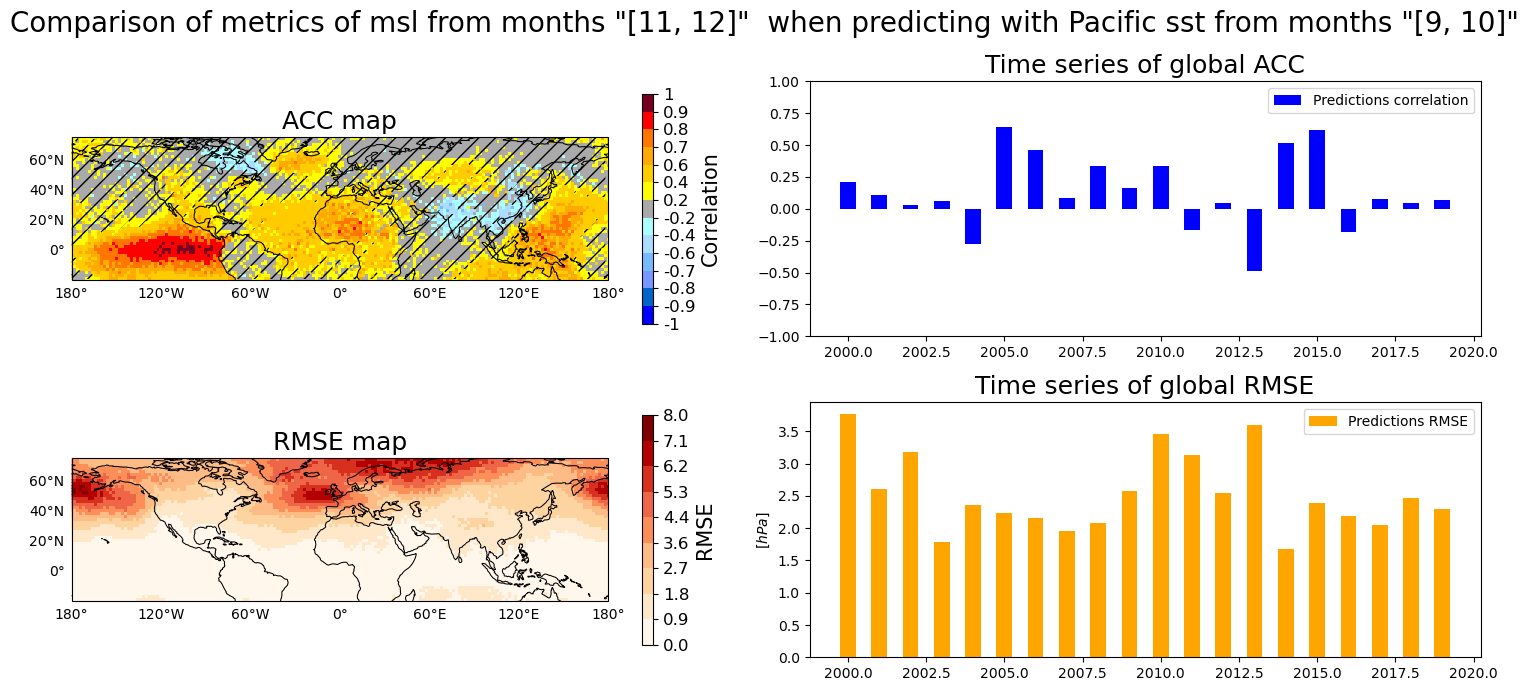

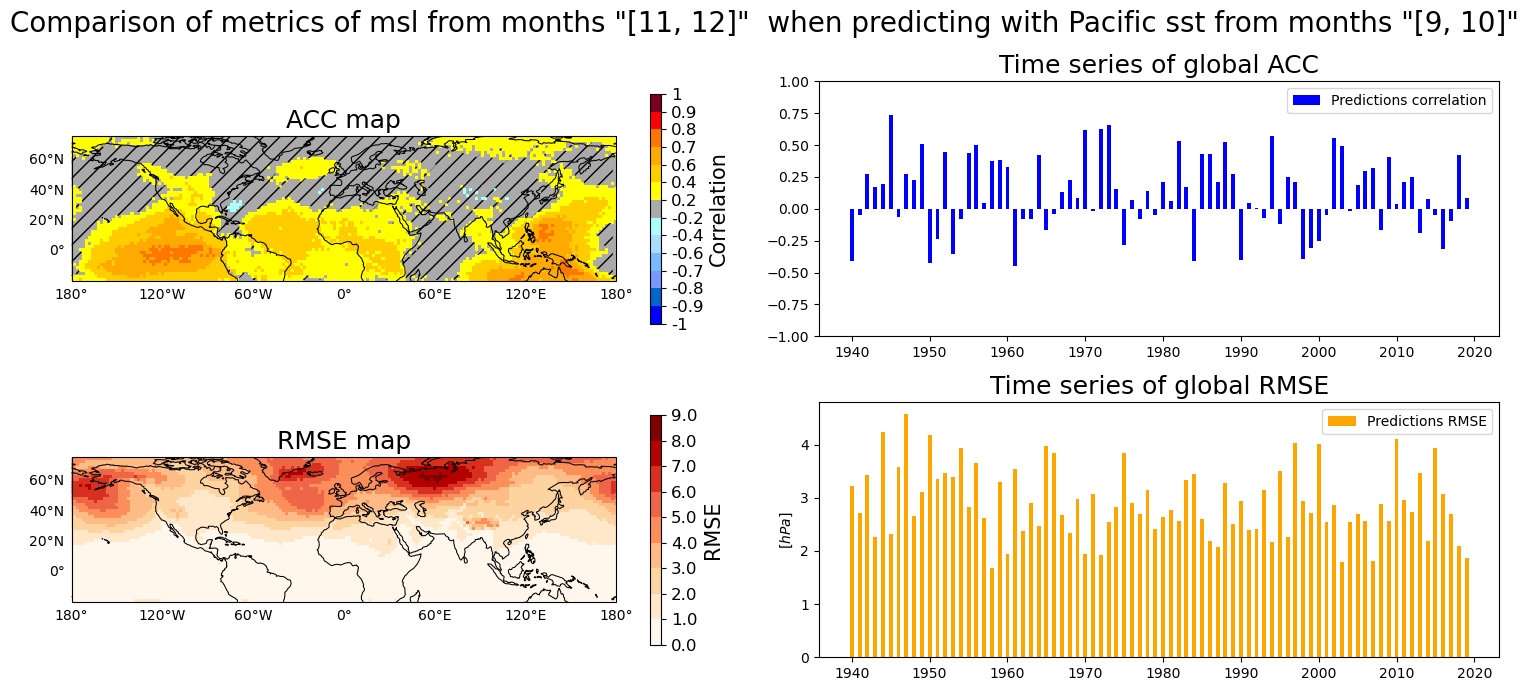

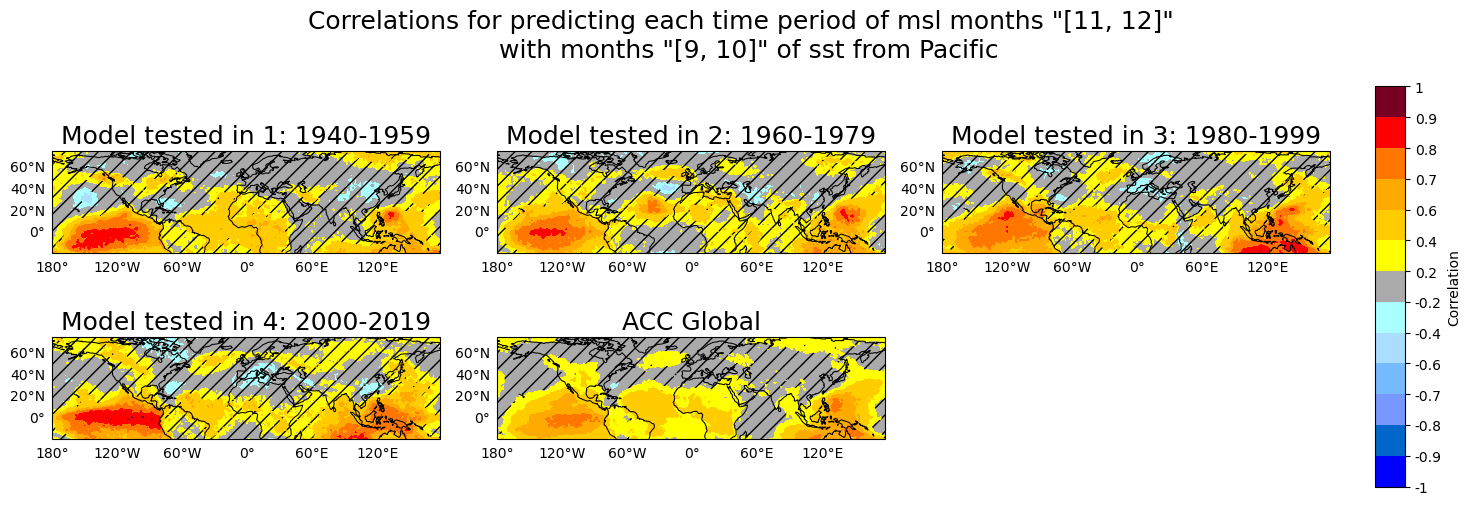

In [13]:
params_selection = {
    'pos_number_layers': 4,  # set the maximum value of fully connected layers (int)
    'pos_layer_sizes': [16, 64, 256],  # set the possible layer sizes (list)
    'pos_activations': ["elu", "linear"],  # set the possible activation functions (possibilities are all the ones availabe in tensorflow: tf.keras.layers.activations()) (list)
    'pos_dropout': [0.0, 0.1],  # set the possible dropout rates (list)
    'pos_kernel_regularizer': ["l2","l1_l2"],  # set the possible kernel regularizer (possibilities are: l1_l2, l1, l2, None) (list)
    'search_skip_connections': False,  # set if searching for skip connections (either intermediate or end_to_end) (bool)
    'pos_conv_layers': 0,  # set the maximum number of convolutional layers, the entry data must be 2D (int)
    'pos_learning_rate':  [1e-4,1e-3]} # set the possible learning rates (list)

#In the following line, you can modify the maximum number of trials ("max_trials") that the searcher does to look for the more optimum hyperparameters
outputs_bm_cross_validation = Model_searcher(dictionary_hyperparams=hyperparameters, dictionary_preprocess=dictionary_preprocess, dictionary_possibilities=params_selection, max_trials=20, n_cv_folds=4)